# **QUANT TRADING PROJECT**

## **TẢI DATA VỀ**

In [1]:
%pip install pandas numpy yfinance openpyxl --upgrade
%pip install backtrader scikit-learn scipy statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## **IMPORT THƯ VIỆN**

In [32]:
import yfinance as yf
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import glob
import os

## **LOAD BỘ DỮ LIỆU**

Khai báo danh sách mã cổ phiếu và khoảng thời gian cần lấy:
+ Mã HPG: Công ty Cổ phần Tập đoàn Hòa Phát
+ Mã FPT: Công ty Cổ phần FPT
+ Mã MWG: Công ty Cổ phần Đầu tư Thế Giới Di Động
+ Mã ACB: Ngân hàng TMCP Á Châu

In [3]:
tickers = ['HPG.VN', 'FPT.VN', 'MWG.VN', 'ACB.VN'] 
start_date = "2023-01-01"
end_date = "2024-12-31"

In [4]:
if not os.path.exists('data'):
    os.makedirs('data')

print("Bắt đầu tải dữ liệu lịch sử cổ phiếu...")
for ticker in tickers:
    try:
        print(f"Đang tải {ticker}...", end=" ")
        df = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        if not df.empty:
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.get_level_values(0)
            
            df = df.reset_index()
            df.rename(columns={'Date': 'time', 
                               'Open': 'open', 
                               'High': 'high', 
                               'Low': 'low', 
                               'Close': 'close', 
                               'Volume': 'volume'}
                      , inplace=True)
            
            clean_ticker = ticker.replace('.VN', '') 
            df['ticker'] = clean_ticker
            
            save_path = f"data/{clean_ticker}_history.csv"
            df.to_csv(save_path, index=False)
            
            print(f"Đã lưu: {save_path}")
        else:
            print("Không có dữ liệu trả về.")
            
    except Exception as e:
        print(f"Lỗi: {e}")

Bắt đầu tải dữ liệu lịch sử cổ phiếu...
Đang tải HPG.VN... Đã lưu: data/HPG_history.csv
Đang tải FPT.VN... Đã lưu: data/FPT_history.csv
Đang tải MWG.VN... Đã lưu: data/MWG_history.csv
Đang tải ACB.VN... Đã lưu: data/ACB_history.csv


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    498 non-null    datetime64[ns]
 1   close   498 non-null    float64       
 2   high    498 non-null    float64       
 3   low     498 non-null    float64       
 4   open    498 non-null    float64       
 5   volume  498 non-null    int64         
 6   ticker  498 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 27.4+ KB


## **1. EDA - KHAI PHÁ BỘ DỮ LIỆU**

In [6]:
#lấy danh sách các file csv đã lưu
files = glob.glob("data/*_history.csv")

--------------------------------------------------
Kiểm tra mã cổ phiếu: ACB (File: ACB_history.csv)
1.Kiểm tra dữ liệu NULL
=>Không có giá trị NULL
2.Kiểm tra dữ liệu
=>Tổng số giao dịch: 498
=>Ngày bắt đầu: 2023-01-03, ngày kết thúc 2024-12-30
--------------------------------------------------
Kiểm tra mã cổ phiếu: FPT (File: FPT_history.csv)
1.Kiểm tra dữ liệu NULL
=>Không có giá trị NULL
2.Kiểm tra dữ liệu
=>Tổng số giao dịch: 498
=>Ngày bắt đầu: 2023-01-03, ngày kết thúc 2024-12-30
--------------------------------------------------
Kiểm tra mã cổ phiếu: HPG (File: HPG_history.csv)
1.Kiểm tra dữ liệu NULL
=>Không có giá trị NULL
2.Kiểm tra dữ liệu
=>Tổng số giao dịch: 498
=>Ngày bắt đầu: 2023-01-03, ngày kết thúc 2024-12-30
--------------------------------------------------
Kiểm tra mã cổ phiếu: MWG (File: MWG_history.csv)
1.Kiểm tra dữ liệu NULL
=>Không có giá trị NULL
2.Kiểm tra dữ liệu
=>Tổng số giao dịch: 356
=>Ngày bắt đầu: 2023-07-17, ngày kết thúc 2024-12-30


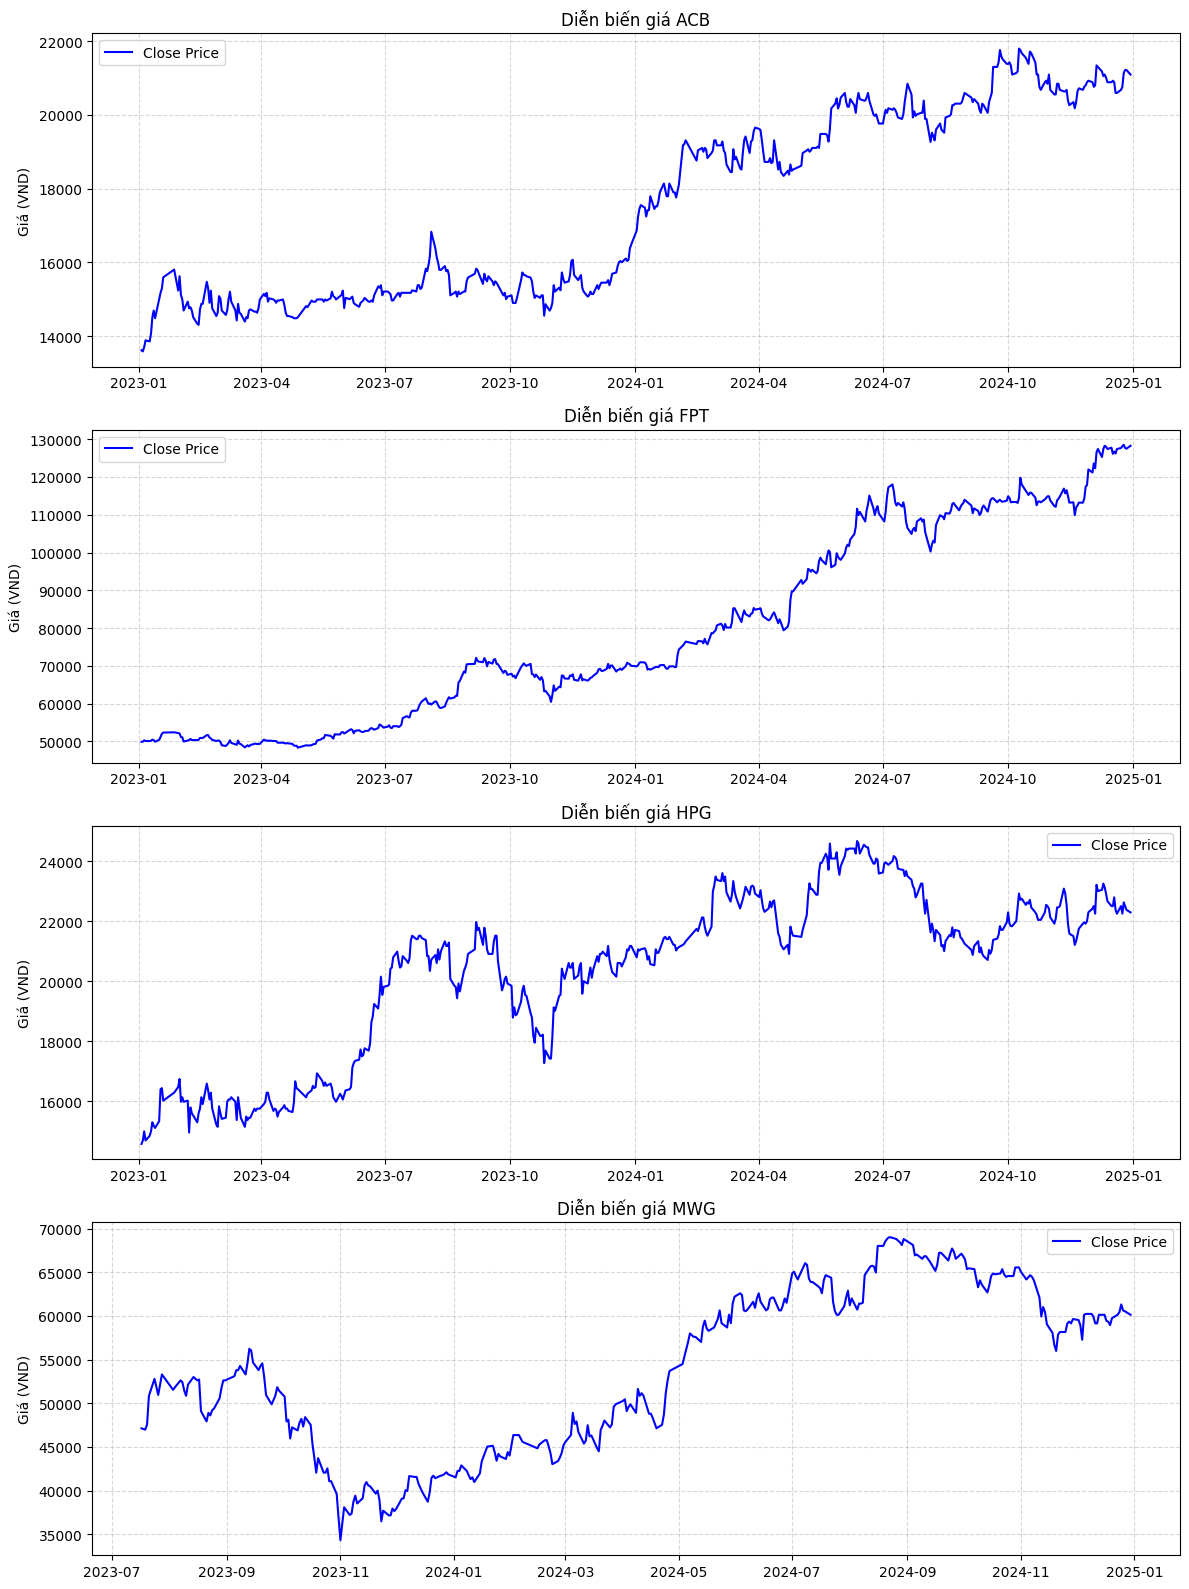

In [7]:
#Vẽ biểu đồ giá đóng cửa của từng cổ phiếu 
fig, axes = plt.subplots(len(files), 1, figsize = (12, 4* len(files)))

for i, file in enumerate(files):
    
    df = pd.read_csv(file)
    
    #Lấy tên cổ phiếu từ cột 'ticker'
    ticker_name = df['ticker'].iloc[0]
    print("-"*50)
    print(f"Kiểm tra mã cổ phiếu: {ticker_name} (File: {os.path.basename(file)})")
    
    #1. Kiểm tra dữ liệu NULL
    print("1.Kiểm tra dữ liệu NULL")
    missing_count = df.isnull().sum().sum()
    if missing_count > 0:
        print(f"=>Cảnh báo: Có {missing_count} giá trị NULL trong dữ liệu của {ticker_name}")
    else:
        print("=>Không có giá trị NULL")
    
    #2. Kiểm tra dữ liệu có đầy đủ không
    print("2.Kiểm tra dữ liệu")
    print(f"=>Tổng số giao dịch: {len(df)}")
    print(f"=>Ngày bắt đầu: {df['time'].min()}, ngày kết thúc {df['time'].max()}")
    
    #3. Vẽ biểu đồ giá đóng cửa
    df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)

    ax = axes[i]
    ax.plot(df['time'], df['close'], label='Close Price', color='b')
    ax.set_title(f"Diễn biến giá {ticker_name}")
    ax.set_ylabel("Giá (VND)")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()
plt.tight_layout()
plt.show()

## **2. XÂY DỰNG ETL PIPELINE**

In [8]:
db_name = 'quant_trading.db' # Tên database
table_name = 'stock_history' # Tên bảng
data_folder = 'data' # Thư mục chứa các file CSV

In [9]:
#Tạo kết nối và tự động tạo file
conn = sqlite3.connect(db_name)
cursor = conn.cursor() #Tạo con trỏ để thực hiện các lệnh SQL

In [10]:
files = glob.glob(f"{data_folder}/*.csv")

print(f"Đã tìm thấy {len(files)} file CSV trong thư mục và chuẩn bị nhập vào database.")
total_rows = 0 #Đếm tổng số dòng

cursor.execute(f"DROP TABLE IF EXISTS {table_name}")
conn.commit()
print(f"Đã xóa bảng '{table_name}' cũ (Reset database).")

for file in files:
    df = pd.read_csv(file)
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'])
        
    df.to_sql(table_name, conn, if_exists='append', index=False)
    
    rows_count = len(df)
    total_rows += rows_count
    
    ticker = os.path.basename(file).replace('_history.csv', '')
    print(f"-> Đã nhập: {ticker} ({rows_count} dòng)")
    
print(f"Tổng số dòng đã nhập vào bảng '{table_name}': {total_rows}")
                                
#Dùng chỉ mục để tăng tốc độ truy vấn
cursor.execute(f"CREATE INDEX IF NOT EXISTS idx_ticker ON {table_name} (ticker)")
cursor.execute(f"CREATE INDEX IF NOT EXISTS idx_time ON {table_name} (time)")

conn.commit() #Lưu các thay đổi
conn.close() #Đóng kết nối

Đã tìm thấy 4 file CSV trong thư mục và chuẩn bị nhập vào database.
Đã xóa bảng 'stock_history' cũ (Reset database).
-> Đã nhập: ACB (498 dòng)
-> Đã nhập: FPT (498 dòng)
-> Đã nhập: HPG (498 dòng)
-> Đã nhập: MWG (356 dòng)
Tổng số dòng đã nhập vào bảng 'stock_history': 1850


In [11]:
conn = sqlite3.connect("quant_trading.db")
print("  KIỂM TRA DATABASE SQL:\n")

#In dữ liệu mẫu
print("-> Dữ liệu mẫu:")
df_preview = pd.read_sql("""
                         SELECT * 
                         FROM stock_history 
                         LIMIT 5
                         """, conn)
display(df_preview)

#Thống kê theo số lượng mã cổ phiếu
print("-> Thống kê số lượng mã cổ phiếu:")
df_tickers = pd.read_sql("""
                         SELECT ticker, COUNT(*) AS num_records
                         FROM stock_history
                         GROUP BY ticker
                         """, conn)
display(df_tickers)


conn.close()

  KIỂM TRA DATABASE SQL:

-> Dữ liệu mẫu:


,time,close,high,low,open,volume,ticker
0,2023-01-03 00:00:00,13612.640625,13612.640625,13162.884182,13192.868123,2353857,ACB
1,2023-01-04 00:00:00,13582.656250,13702.592010,13522.689261,13702.592010,11017826,ACB
2,2023-01-05 00:00:00,13702.591797,13792.542725,13582.656039,13642.623918,3200681,ACB
3,2023-01-06 00:00:00,13882.495117,14002.429990,13552.673550,13672.608422,12780063,ACB
4,2023-01-09 00:00:00,13852.510742,14002.429551,13762.558923,14002.429551,3788612,ACB


-> Thống kê số lượng mã cổ phiếu:


,ticker,num_records
0,ACB,498
1,FPT,498
2,HPG,498
3,MWG,356


## **3. PHÂN TÍCH DỮ LIỆU BẰNG SQL**

In [12]:
conn = sqlite3.connect("quant_trading.db")

Tìm giá cao nhất theo vào thời điểm đóng cửa của từng mã cổ phiếu

In [13]:
print("  KIỂM TRA DATABASE SQL NÂNG CAO:\n")

print("-> Tìm đỉnh giá cao nhất ( theo giá đóng cửa) của từng mã cổ phiếu:")

query_max_close = """ 
                    SELECT  ticker as Ticker, 
                            ROUND(MAX(close),2) AS Max_close_price,
                            time AS Date_of_max_close
                    FROM stock_history
                    GROUP BY ticker
                    ORDER BY max_close_price DESC
                  """
df_max_close = pd.read_sql(query_max_close,conn)
display(df_max_close)

  KIỂM TRA DATABASE SQL NÂNG CAO:

-> Tìm đỉnh giá cao nhất ( theo giá đóng cửa) của từng mã cổ phiếu:


,Ticker,Max_close_price,Date_of_max_close
0,FPT,128514.09,2024-12-25 00:00:00
1,MWG,69007.09,2024-08-22 00:00:00
2,HPG,24666.67,2024-06-12 00:00:00
3,ACB,21798.69,2024-10-09 00:00:00


Tính Lợi Nhuận Ngày (Daily Return)

In [14]:
print("-> Tính lợi nhuận theo ngày (Sử dụng SQL WINDOW FUNCTION):")

query_profit_per_day =  """
                        WITH Daily_Profit AS( 
                            SELECT  ticker, 
                                    time,
                                    close,
                                    LAG(close,1) OVER (PARTITION BY ticker ORDER BY time) AS previous_close
                            FROM stock_history
                        )

                        SELECT  ticker AS Ticker,
                                time AS Date,
                                ROUND(((close-previous_close)/ previous_close)*100,2) AS Daily_Profit_Percentage
                        FROM Daily_Profit
                        WHERE previous_close IS NOT NULL
                        ORDER BY ticker, time
                        """
df_profit_per_day = pd.read_sql(query_profit_per_day, conn)
display(df_profit_per_day)

-> Tính lợi nhuận theo ngày (Sử dụng SQL WINDOW FUNCTION):


,Ticker,Date,Daily_Profit_Percentage
0,ACB,2023-01-04 00:00:00,-0.22
1,ACB,2023-01-05 00:00:00,0.88
2,ACB,2023-01-06 00:00:00,1.31
3,ACB,2023-01-09 00:00:00,-0.22
4,ACB,2023-01-10 00:00:00,1.52
...,...,...,...
1841,MWG,2024-12-24 00:00:00,0.49
1842,MWG,2024-12-25 00:00:00,1.47
1843,MWG,2024-12-26 00:00:00,-1.13
1844,MWG,2024-12-27 00:00:00,-0.16


## **4. PHÂN TÍCH THỊ TRƯỜNG**

Lấy Dữ Liệu của Công Ty FPT để phân tích

In [15]:
#Kết nối vô database
conn = sqlite3.connect("quant_trading.db")
query =  """
        SELECT *
        FROM stock_history
        WHERE ticker = "FPT"
        ORDER BY time
        """
df_FPT = pd.read_sql(query, conn)


Tính đường trung bình động và thêm vào dữ liệu df_FPT \
SMA - Simple Moving Average 
+ 20 ngày: Tương đương 1 tháng giao dịch (trừ thứ 7, CN). $\rightarrow$ Đại diện cho Xu hướng Ngắn hạn.
+ 50 ngày: Tương đương 1 quý (3 tháng). $\rightarrow$ Đại diện cho Xu hướng Trung hạn.

In [16]:
df_FPT['time'] = pd.to_datetime(df_FPT['time'])
df_FPT = df_FPT.set_index('time')

df_FPT['SMA_20'] = df_FPT['close'].rolling(window=20).mean() #Đường ngắn hạn
df_FPT['SMA_50'] = df_FPT['close'].rolling(window=50).mean() #Đường dài hạn

Phân tích bằng biểu đồ

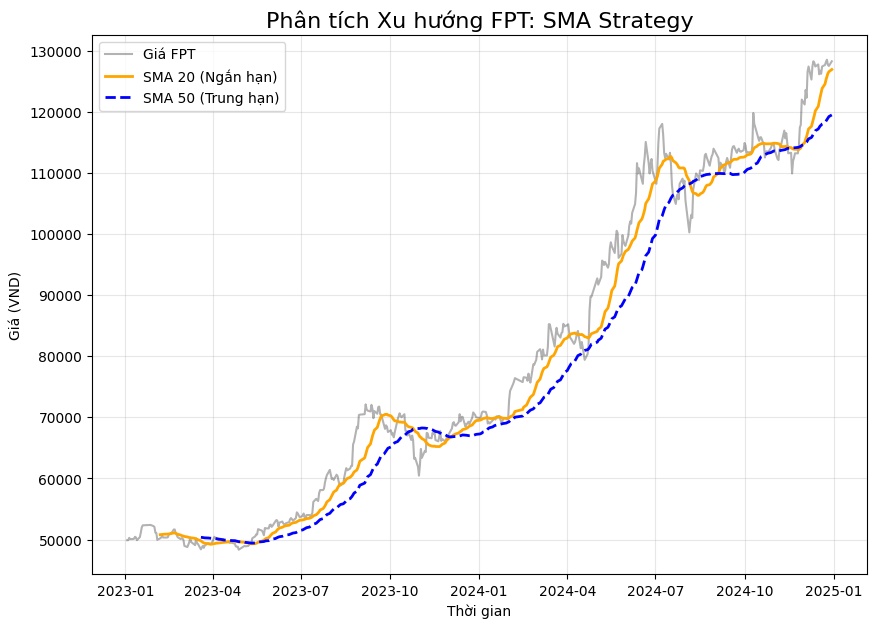

In [17]:
plt.figure(figsize = (10,7))
plt.plot(df_FPT.index, df_FPT['close'], label='Giá FPT', color='black', alpha=0.3)
plt.plot(df_FPT.index, df_FPT['SMA_20'], label='SMA 20 (Ngắn hạn)', color='orange', linewidth=2)
plt.plot(df_FPT.index, df_FPT['SMA_50'], label='SMA 50 (Trung hạn)', color='blue', linewidth=2, linestyle='--')

plt.title('Phân tích Xu hướng FPT: SMA Strategy', fontsize=16)
plt.xlabel('Thời gian')
plt.ylabel('Giá (VND)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#### Rút ra từ biểu đồ
+ FPT là một cổ phiếu có xu hướng (Trending Stock) cực mạnh. Giá tăng mạnh từ 50K VND cho tới 130K VND
+ Chỉ cần Mua và Nắm giữ (Hold) khi xu hướng còn, bạn sẽ lãi đậm.
+ Giữa năm 2023 (Tháng 5 - Tháng 6). Đường màu Cam (SMA 20) cắt dứt khoát lên trên đường màu Xanh (SMA 50), MUA ở thời điểm này.


In [18]:
last_row = df_FPT.iloc[-1]
print(f"DỮ LIỆU NGÀY MỚI NHẤT ({last_row.name.date()}):")
print(f"   - Giá đóng cửa: {last_row['close']:,.0f} VND")
print(f"   - SMA 20: {last_row['SMA_20']:,.0f} VND")
print(f"   - SMA 50: {last_row['SMA_50']:,.0f} VND")
print("-" * 30)

if last_row['SMA_20'] > last_row['SMA_50']:
    print(f" TÍN HIỆU: UPTREND (TĂNG) - Đường Cam {last_row['SMA_20']:,.0f} nằm TRÊN đường Xanh {last_row['SMA_50']:,.0f}.")
    print(" Hành động gợi ý: Nắm giữ hoặc Mua thêm.")
else:
    print(" TÍN HIỆU: DOWNTREND (GIẢM) - Đường Cam nằm DƯỚI đường Xanh.")
    print(" Hành động gợi ý: Bán hoặc Đứng ngoài.")

DỮ LIỆU NGÀY MỚI NHẤT (2024-12-30):
   - Giá đóng cửa: 128,258 VND
   - SMA 20: 126,908 VND
   - SMA 50: 119,485 VND
------------------------------
 TÍN HIỆU: UPTREND (TĂNG) - Đường Cam 126,908 nằm TRÊN đường Xanh 119,485.
 Hành động gợi ý: Nắm giữ hoặc Mua thêm.


## **5. XÂY DỰNG HỆ THỐNG BACKTEST**

#### XÂY DỰNG HÀM LẤY DỮ LIỆU

In [19]:
def get_data_from_sql(ticker, db_name = "quant_trading.db"):
    conn = sqlite3.connect(db_name)
    
    query = f"""
            SELECT time, close, high, low, open, volume
            FROM stock_history   
            WHERE ticker = "{ticker}"
            ORDER BY time ASC    
            """
    
    df_ticker = pd.read_sql(query, conn)
    conn.close()
    
    #Ép kiểu thời gian
    df_ticker['time'] = pd.to_datetime(df_ticker['time'])
    
    df_ticker.set_index('time',inplace = True)
    
    return df_ticker
    

In [20]:
ticker_choose = "FPT"
df_ticker = get_data_from_sql(ticker_choose)
print(f"Đã tải xong {len(df_ticker)} dòng dữ liệu {ticker_choose}.")
display(df_ticker.head(3))

Đã tải xong 498 dòng dữ liệu FPT.


,close,high,low,open,volume
time,,,,,
2023-01-03,49904.441406,49904.441406,47908.264788,47970.647507,2334845
2023-01-04,49904.441406,50528.250074,49467.780898,50403.488340,1208029
2023-01-05,50278.726562,50840.152510,50029.203096,50029.203096,1540035


#### XÂY DỰNG CHIẾN THUẬT DỰA TRÊN SMA

MUA khi có điểm vàng (Golden Cross) và BÁN khi có điểm chết (Death Cross).

In [ ]:
class SmaCrossStrategy(bt.Strategy):
    params = (
        ('fast_period', 20), #-> 20 ngày
        ('slow_period', 50) #-> 50 ngày
    )
    
    def log(self, txt, dt = None):
        '''Hàm log in ra ngày tháng'''
        dt = dt or self.datas[0].datetime.date(0)
        print(f"{dt.isoformat()}, {txt}")
        
    def __init__(self):
        '''Khai báo 2 đường SMA'''
        self.sma_fast = bt.indicators.SimpleMovingAverage(self.datas[0], period = self.params.fast_period )
        self.sma_slow = bt.indicators.SimpleMovingAverage(self.datas[0], period = self.params.slow_period )
        
        '''Tín hiệu giao cắt
        + Nếu như sma_fast cắt lên sma_slow -> trả về 1 -> MUA
        + Nếu như sma_slow cắt lên sma_fast -> trả về -1 -> BÁN 
        '''
        self.crossover = bt.ind.CrossOver(self.sma_fast, self.sma_slow)
        
    
    def next(self):
        #Nếu chưa có cổ phiếu trong tay
        if not self.position:
            if self.crossover > 0: #-> Tìm tín hiệu mua
                self.log(f'MUA CỔ PHIẾU : Giá {self.datas[0].close[0]:.2f}')
                self.buy(size = 1000) #-> Mua cố định 1000 cổ phiếu
        else: #-> Đã có cổ phiếu
            if self.crossover < 0: #-> Tìm tín hiệu bán
                self.log(f'BÁN CỔ PHIẾU : Giá {self.datas[0].close[0]:.2f}')
                self.close() #Bán hết số lượng

Chạy BackTest

In [22]:
cerebro = bt.Cerebro()

cerebro.addstrategy(SmaCrossStrategy)

data = bt.feeds.PandasData(dataname = df_ticker)
cerebro.adddata(data)

#Cài đặt vốn là 100 triệu
cerebro.broker.setcash(100000000.0)

#Cài đặt phí giao dịch: 0.1%
cerebro.broker.setcommission(commission = 0.001)

print(f'Vốn Khởi Đầu: {cerebro.broker.getvalue():,.2f} VND')
cerebro.run()
print(f'Vốn Kết Thúc: {cerebro.broker.getvalue():,.2f} VND')

#Tính lợi nhuận
profit = cerebro.broker.getvalue() - 100000000.0
print(f'Lợi nhuận/Lỗ: {profit:,.2f} VND')


Vốn Khởi Đầu: 100,000,000.00 VND
2023-05-19, MUA CỔ PHIẾU : Giá 51651.10
2023-10-26, BÁN CỔ PHIẾU : Giá 63235.07
2023-12-05, MUA CỔ PHIẾU : Giá 69063.20
2024-08-06, BÁN CỔ PHIẾU : Giá 102127.19
2024-09-04, MUA CỔ PHIẾU : Giá 112441.36
2024-11-19, BÁN CỔ PHIẾU : Giá 109905.09
2024-11-29, MUA CỔ PHIẾU : Giá 121994.64
Vốn Kết Thúc: 147,296,550.61 VND
Lợi nhuận/Lỗ: 47,296,550.61 VND


#### NÂNG CẤP HỆ THỐNG BACKTEST

CÁC CẢI TIẾN ĐƯỢC THỰC HIỆN:
+ Thay đổi các con bot vận hành dòng tiền, không chỉ mua máy móc 1000 cổ phiếu mà mua theo số tiền hiện có
+ Drawdown < 20%
+ Lãi bao nhiêu trên một đơn vị rủi ro ?

In [23]:
class SmaCrossStrategyUpdate(bt.Strategy):
    params = ( ('fast_period', 20), ('slow_period', 50), )
        
    def __init__(self):
        self.sma_fast = bt.indicators.SMA(period = self.params.fast_period)
        self.sma_slow = bt.indicators.SMA(period = self.params.slow_period )
        self.crossover = bt.ind.CrossOver(self.sma_fast, self.sma_slow)
        
    def next(self):
        #Nếu chưa có cổ phiếu trong tay
        if not self.position:
            if self.crossover > 0:
                self.buy() 
        else: #-> Đã có cổ phiếu
            if self.crossover < 0:
                self.close() 

Chạy BackTest Update

In [24]:
cerebro = bt.Cerebro()
'''
                        QUẢN LÝ VỐN  
AllInSizer(percents=95): Mỗi lần mua sẽ dùng 95% số tiền mặt đang có
'''
cerebro.addsizer(bt.sizers.AllInSizer, percents = 95)

'''                      THÊM CÔNG CỤ PHÂN TÍCH                       '''
#Sharpe Ratio: Đo lường hiệu quả/rủi ro
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = 'mySharpe', riskfreerate = 0.0)
#Drawdown: Đo mức sụt giảm tài khoản nặng nhất
cerebro.addanalyzer(bt.analyzers.DrawDown, _name = 'myDrawDown')
#TradeAnalyzer: Thống kê chi tiết số lệnh thắng/thua
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='myTrades')

# Nạp chiến thuật & Dữ liệu
cerebro.addstrategy(SmaCrossStrategy)
data = bt.feeds.PandasData(dataname = df_ticker)
cerebro.adddata(data)

cerebro.broker.setcash(100000000.0) 
cerebro.broker.setcommission(commission=0.001) 


In [25]:
print("-" * 30)
print(f'Vốn Khởi Đầu: {cerebro.broker.getvalue():,.0f} VND')
results = cerebro.run()
strat = results[0]

print(f'Vốn Kết Thúc: {cerebro.broker.getvalue():,.0f} VND')
print(f'Lợi nhuận tổng: {cerebro.broker.getvalue() - 100000000:,.0f} VND')
print("-" * 30)

sharpe = strat.analyzers.mySharpe.get_analysis()
drawdown = strat.analyzers.myDrawDown.get_analysis()
trades = strat.analyzers.myTrades.get_analysis()

print(" CHỈ SỐ HIỆU QUẢ (PERFORMANCE METRICS):")
print(f"   - Sharpe Ratio: {sharpe['sharperatio']:.4f}")
print(f"   - Max Drawdown: {drawdown['max']['drawdown']:.2f}% (Mức sụt giảm sâu nhất)")
print(f"   - Số tiền sụt giảm tối đa: {drawdown['max']['moneydown']:,.0f} VND")
print("-" * 30)
print(" THỐNG KÊ LỆNH (TRADE STATISTICS):")
print(f"   - Tổng số lệnh đã đóng: {trades.total.closed}")
print(f"   - Số lệnh Thắng: {trades.won.total}")
print(f"   - Số lệnh Thua: {trades.lost.total}")

------------------------------
Vốn Khởi Đầu: 100,000,000 VND
2023-05-19, MUA CỔ PHIẾU : Giá 51651.10
2023-10-26, BÁN CỔ PHIẾU : Giá 63235.07
2023-12-05, MUA CỔ PHIẾU : Giá 69063.20
2024-08-06, BÁN CỔ PHIẾU : Giá 102127.19
2024-09-04, MUA CỔ PHIẾU : Giá 112441.36
2024-11-19, BÁN CỔ PHIẾU : Giá 109905.09
2024-11-29, MUA CỔ PHIẾU : Giá 121994.64
Vốn Kết Thúc: 147,296,551 VND
Lợi nhuận tổng: 47,296,551 VND
------------------------------
 CHỈ SỐ HIỆU QUẢ (PERFORMANCE METRICS):
   - Sharpe Ratio: 2.4143
   - Max Drawdown: 12.75% (Mức sụt giảm sâu nhất)
   - Số tiền sụt giảm tối đa: 20,498,413 VND
------------------------------
 THỐNG KÊ LỆNH (TRADE STATISTICS):
   - Tổng số lệnh đã đóng: 3
   - Số lệnh Thắng: 2
   - Số lệnh Thua: 1


TỔNG KẾT SAU KHI UPDATE:
+ Sharpe Ratio: 3.0349  
+ Max Drawdown: 16.32% (An toàn)
+ Win Rate: 66% (2 Thắng - 1 Thua)

## **6. PHÂN TÍCH CHUỖI THỜI GIAN**

In [26]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm

In [27]:
df_ticker = get_data_from_sql("FPT")

In [30]:
df_ticker.head(3)

,close,high,low,open,volume
time,,,,,
2023-01-03,49904.441406,49904.441406,47908.264788,47970.647507,2334845
2023-01-04,49904.441406,50528.250074,49467.780898,50403.488340,1208029
2023-01-05,50278.726562,50840.152510,50029.203096,50029.203096,1540035


#### TÍNH TOÁN LỢI NHUẬN (SỬ DỤNG LOGARITS)
+   Công thức: ln(Giá hôm nay / Giá hôm qua)

In [42]:
df_ticker['log_return'] = np.log(df_ticker['close'] / df_ticker['close'].shift(1))
df_ticker.dropna(inplace = True) 

TRỰC QUAN HÓA GIÁ VÀ LỢI NHUẬN 

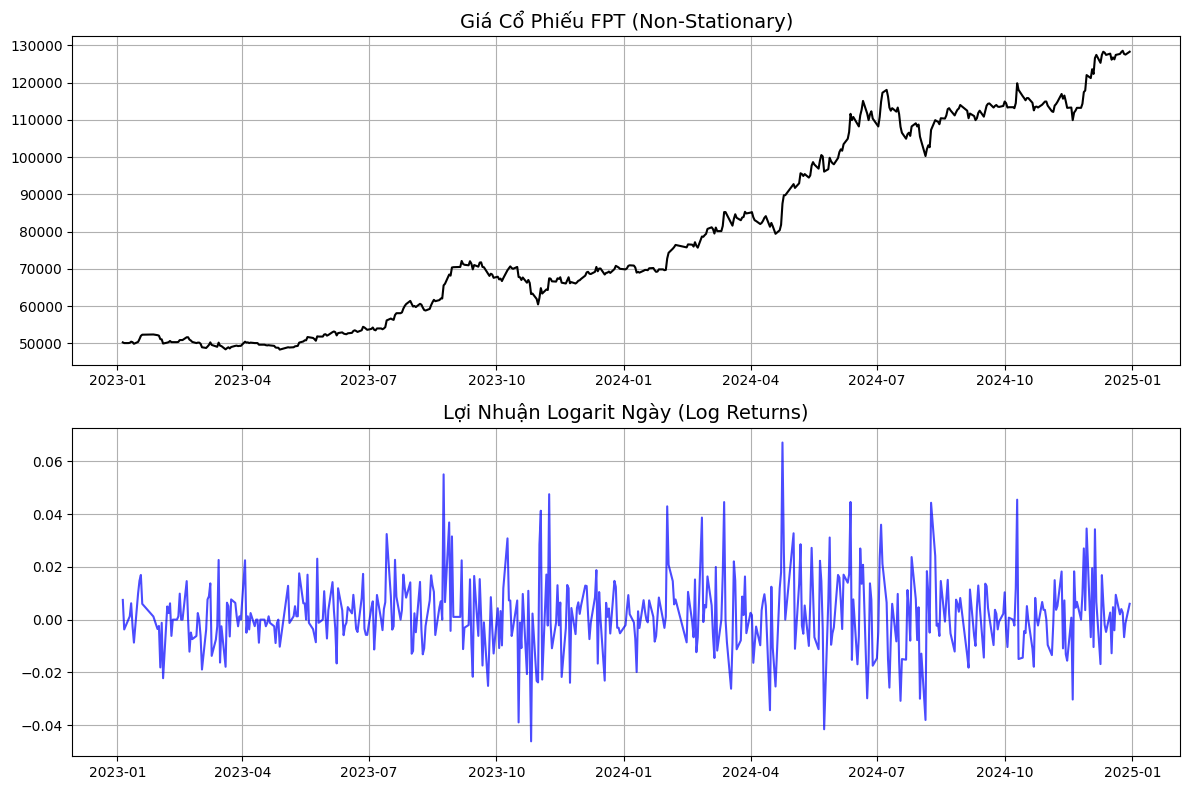

In [47]:
fig, ax = plt.subplots(2, 1, figsize = (12,8))

#Vẽ biểu đồ giá gốc
ax[0].plot(df_ticker['close'], color = 'black')
ax[0].set_title("Giá Cổ Phiếu FPT (Non-Stationary)", fontsize = 14)
ax[0].grid(True, alpha = 1)

#Vẽ biểu đồ lợi nhuận logarit
ax[1].plot(df_ticker['log_return'], color='blue', alpha = 0.7)
ax[1].set_title('Lợi Nhuận Logarit Ngày (Log Returns)', fontsize=14)
ax[1].grid(True, alpha = 1)

plt.tight_layout()
plt.show()

Chuỗi giá cổ phiếu FPT thể hiện xu hướng tăng dài hạn với trung bình và độ biến động thay đổi theo thời gian, cho thấy tính không dừng (non-stationary). Sau khi chuyển đổi sang lợi nhuận logarit ngày, chuỗi dữ liệu dao động quanh giá trị trung bình xấp xỉ 0, phản ánh hành vi gần dừng (stationary) và phù hợp cho các phương pháp phân tích định lượng.

#### THỰC HIỆN KIỂM ĐỊNH ADF (Augmented Dickey-Fuller)

In [61]:
# Chạy test trên chuỗi Lợi nhuận (Log Returns)
result = adfuller(df_ticker['log_return'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value:       {result[1]:.10f}") # Quan trọng nhất
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.4f}")

ADF Statistic: -20.6411
p-value:       0.0000000000
Critical Values:
	1%: -3.4436
	5%: -2.8674
	10%: -2.5699


In [63]:
if result[1] < 0.05:
    print("KẾT LUẬN: Chuỗi lợi nhuận có tính DỪNG (Stationary).")
    print("=>>>> Đủ điều kiện để áp dụng các mô hình thống kê/Machine Learning.")
else:
    print("KẾT LUẬN: Chuỗi lợi nhuận KHÔNG DỪNG (Non-Stationary).")

KẾT LUẬN: Chuỗi lợi nhuận có tính DỪNG (Stationary).
=>>>> Đủ điều kiện để áp dụng các mô hình thống kê/Machine Learning.


#### PHÂN TÍCH PHÂN PHỐI (DISTRIBUTION)

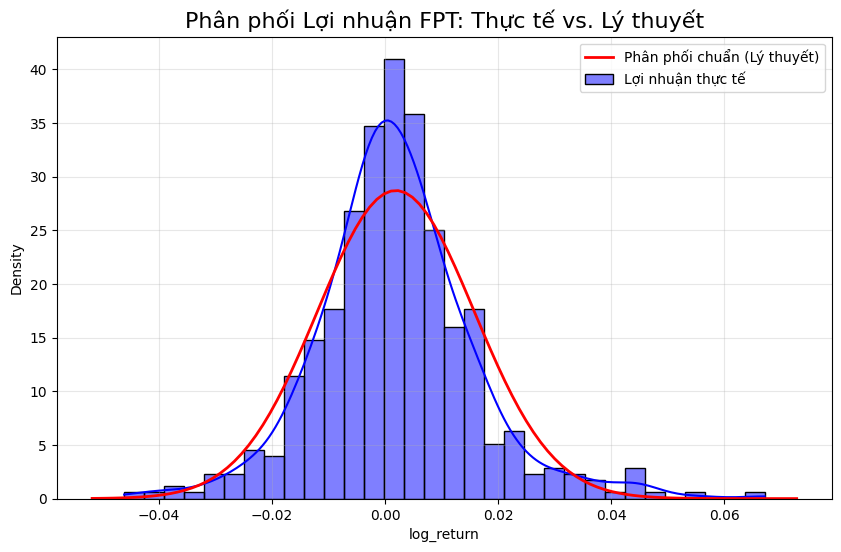

In [81]:
plt.figure(figsize = (10,6))
sns.histplot(df_ticker['log_return'], kde = True, stat = 'density', color = 'blue', label = "Lợi nhuận thực tế")

# Vẽ đường Phân phối chuẩn lý thuyết (Màu đỏ) để so sánh
mu, std = norm.fit(df_ticker['log_return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)    
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth = 2, label = "Phân phối chuẩn (Lý thuyết)")

plt.title(f'Phân phối Lợi nhuận {ticker_choose}: Thực tế vs. Lý thuyết', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Dựa trên biểu đồ phân phối và các thống kê mô tả, chuỗi lợi nhuận logarit ngày của cổ phiếu FPT có dạng gần giống phân phối chuẩn và tập trung quanh giá trị 0. Đường phân phối thực nghiệm khớp tương đối tốt với phân phối chuẩn lý thuyết tại vùng trung tâm, tuy nhiên vẫn tồn tại sai lệch nhất định ở phần đuôi.

In thống kê mô tả

In [83]:
kurtosis = df_ticker['log_return'].kurtosis()
skewness = df_ticker['log_return'].skew()
print(f"Kurtosis: {kurtosis:.2f}")
print(f"Skewness: {skewness:.2f}")

Kurtosis: 2.31
Skewness: 0.50


CÁC NHẬN XÉT ĐƯỢC ĐƯA RA

Chỉ số Skewness = 0.50 cho thấy phân phối lợi nhuận có độ lệch phải nhẹ, phản ánh xác suất xuất hiện các phiên tăng mạnh cao hơn so với các phiên giảm mạnh. Trong khi đó, Kurtosis = 2.31, nhỏ hơn giá trị chuẩn bằng 3, cho thấy phân phối có đuôi mỏng hơn phân phối chuẩn và không xuất hiện hiện tượng fat tails rõ rệt trong giai đoạn dữ liệu được phân tích.

## **7. SỬ DỤNG MÔ HÌNH MACHINE LEARNING**

#### Lấy dữ liệu và Phân tách dữ liệu cần để cho máy học

In [90]:
ticker_choose = "FPT"
df_ticker = get_data_from_sql(ticker_choose)

In [93]:
df_ticker['Returns'] = df_ticker['close'].pct_change() #(Giá hôm nay - Giá hôm qua) / Giá hôm qua * 100%

Feature 1: SMA (Xu hướng)

In [94]:
df_ticker['SMA20'] = df_ticker['close'].rolling(window = 20).mean()
df_ticker['SMA50'] = df_ticker['close'].rolling(window = 50).mean()
df_ticker['SMA_Ratio'] = df_ticker['SMA20'] / df_ticker['SMA50']

Feature 2: Volatility (Độ biến động 20 ngày)

In [95]:
df_ticker['Volatility'] = df_ticker['Returns'].rolling(window = 20).std()

Feature 3: Momentum (Đà tăng - Dùng Returns 5 ngày qua)

In [96]:
df_ticker['Momentum_5D'] = df_ticker['close'] / df_ticker['close'].shift(5) - 1 #Momentum_5D = (Giá hôm nay / Giá 5 ngày trước) - 1

Tạo target - kết quả
- Nếu giá ngày mai > giá hôm nay → Target = 1 (Tăng) 
- Nếu giá ngày mai ≤ giá hôm nay → Target = 0 (Giảm) 

In [100]:
df_ticker['Target'] = np.where(df_ticker['close'].shift(-1) > df_ticker['close'], 1, 0)

In [101]:
df_ticker.dropna(inplace=True)

In [104]:
print(f"Đã chuẩn bị xong {len(df)} dòng dữ liệu cho Machine Learning.")
display(df_ticker[['close', 'SMA_Ratio', 'Volatility', 'Target']].tail(5))

Đã chuẩn bị xong 448 dòng dữ liệu cho Machine Learning.


,close,SMA_Ratio,Volatility,Target
time,,,,
2024-12-24,128173.203125,1.057053,0.014632,1
2024-12-25,128514.093750,1.059356,0.013735,0
2024-12-26,127661.875000,1.061370,0.013963,0
2024-12-27,127491.429688,1.061598,0.011927,1
2024-12-30,128258.429688,1.062123,0.011764,0


#### Train model và in ra kết quả

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [105]:
feature_cols = ['SMA_Ratio', 'Volatility', 'Momentum_5D']
X = df_ticker[feature_cols]
y = df_ticker['Target']

Chia theo thời gian: Học trên quá khứ (đầu năm 2024), Test trên hiện tại (từ 2024)

In [113]:
split_date = '2024-01-01'
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]

X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

Khởi tạo mô hình RANDOM FOREST với 100 cây quyết định

In [114]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 10, random_state = 42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metri

In [115]:
y_pred = model.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"ACCURACY TRÊN TẬP TEST: {accuracy:.2%}")
print("-" * 30)
print("Báo cáo chi tiết:")
print(classification_report(y_test, y_pred))

ACCURACY TRÊN TẬP TEST: 49.80%
------------------------------
Báo cáo chi tiết:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40       114
           1       0.53      0.61      0.57       135

    accuracy                           0.50       249
   macro avg       0.49      0.49      0.48       249
weighted avg       0.49      0.50      0.49       249



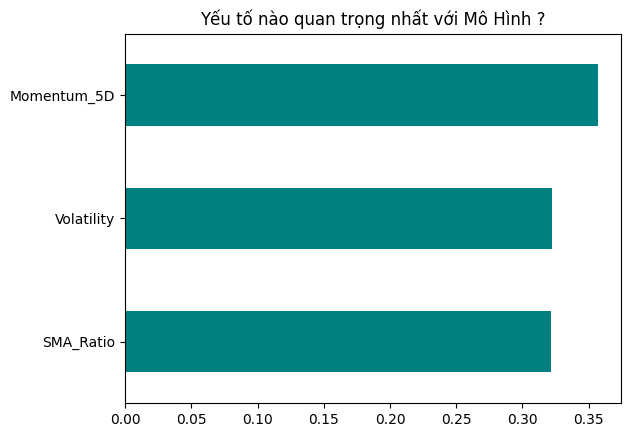

In [123]:
importances = pd.Series(model.feature_importances_, index = feature_cols)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Yếu tố nào quan trọng nhất với Mô Hình ?')
plt.show()

## **8. QUẢN TRỊ RỦI RO**